<a href="https://colab.research.google.com/github/Indian1999/csutortok_17/blob/main/random_kepek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
x = []
y = []
input_size = (90, 90, 3)
path = '/content/drive/MyDrive/csut_kepek/'
for folder in os.listdir(path):
    for file in os.listdir(os.path.join(path, folder)):
        if ".HEIC" in file or ".avif" in file:
            continue
        img_path = os.path.join(path, folder, file)
        img = cv.imread(img_path)
        img = cv.resize(img, (input_size[1], input_size[0]))
        x.append(img)
        y.append(folder)

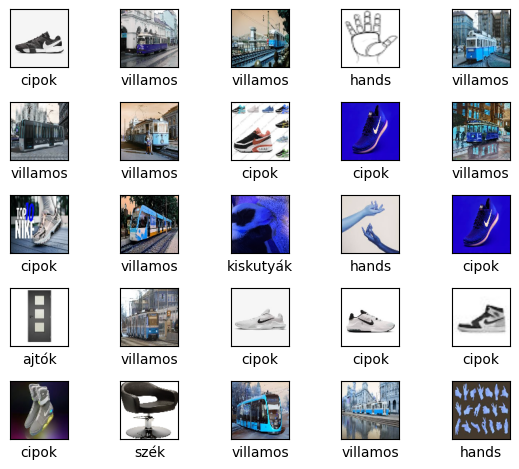

In [4]:
x = np.array(x)
y = np.array(y)

indeces = np.random.randint(0, len(x), size = 25)
images = x[indeces]
labels = y[indeces]

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.xlabel(labels[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()

In [5]:
x = x.astype('float32') / 255
lb = LabelBinarizer()
y = lb.fit_transform(y)
print(y[0])
print(x[0])

[0 0 0 0 0 0 1 0]
[[[0.9607843  0.9137255  0.90588236]
  [0.9607843  0.9137255  0.90588236]
  [0.9607843  0.9137255  0.90588236]
  ...
  [0.9411765  0.88235295 0.8745098 ]
  [0.9411765  0.88235295 0.8745098 ]
  [0.9411765  0.88235295 0.8745098 ]]

 [[0.9607843  0.9137255  0.90588236]
  [0.9607843  0.9137255  0.90588236]
  [0.9607843  0.9137255  0.90588236]
  ...
  [0.9411765  0.88235295 0.8745098 ]
  [0.9411765  0.88235295 0.8745098 ]
  [0.9411765  0.88235295 0.8745098 ]]

 [[0.9607843  0.9137255  0.90588236]
  [0.9607843  0.9137255  0.90588236]
  [0.9607843  0.9137255  0.90588236]
  ...
  [0.9411765  0.88235295 0.8745098 ]
  [0.9411765  0.88235295 0.8745098 ]
  [0.9411765  0.88235295 0.8745098 ]]

 ...

 [[0.96862745 0.93333334 0.92156863]
  [0.96862745 0.93333334 0.92156863]
  [0.96862745 0.93333334 0.92156863]
  ...
  [0.972549   0.9137255  0.9098039 ]
  [0.972549   0.9137255  0.90588236]
  [0.96862745 0.9098039  0.9019608 ]]

 [[0.96862745 0.93333334 0.92156863]
  [0.96862745 0.933

In [6]:
datagen = ImageDataGenerator(
    rotation_range=40,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True)

In [63]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=input_size))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(16, (5, 5), padding = "same", activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten()) #Kiegyenesítjük a mátrix
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(y[0]), activation = "softmax"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)                   │ (None, 86, 86, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 43, 43, 16)          │          12,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 21, 21, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 7056)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 128)                 │         903,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929,144 (3.54 MB)

 Trainable params: 929,144 (3.54 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [65]:
model.fit(datagen.flow(x, y, batch_size = 128), epochs = 100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 873ms/step - accuracy: 0.1451 - loss: 2.1177
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 376ms/step - accuracy: 0.2606 - loss: 2.0189
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.2538 - loss: 1.9702
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.3702 - loss: 1.8309
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.3924 - loss: 1.7154
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step - accuracy: 0.3789 - loss: 1.7580
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 370ms/step - accuracy: 0.3856 - loss: 1.6905
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.4219 - loss: 1.6376
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.4700 - loss: 1.5759
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.4464 - loss: 1.6188
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.4280 - loss: 1.5753
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy:

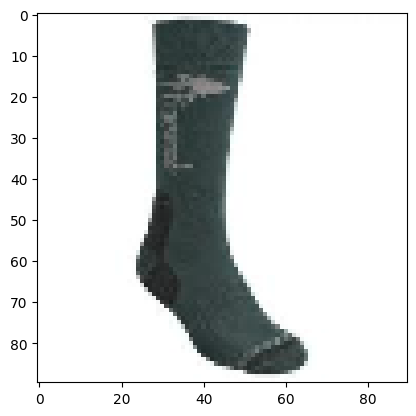

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
['Zokni']


In [66]:
plt.imshow(x[100])
plt.show()
print(lb.inverse_transform(model.predict(x[100].reshape(1, 90, 90, 3))))

In [67]:
print(lb.inverse_transform(model.predict(x)))

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
['hands' 'szék' 'cipok' 'szék' 'hands' 'cipok' 'szék' 'szék' 'cipok'
 'cipok' 'cipok' 'szék' 'szék' 'cipok' 'hands' 'cipok' 'szék' 'hands'
 'szék' 'szék' 'szék' 'szék' 'villamos' 'szék' 'villamos' 'szék'
 'villamos' 'villamos' 'szék' 'cipok' 'szék' 'villamos' 'szék' 'szék'
 'szék' 'szék' 'hands' 'szék' 'szék' 'szék' 'villamos' 'szék'
 'szék' 'ajtók' 'cipok' 'ajtók' 'ajtók' 'ajtók' 'ajtók' 'ajtók'
 'hands' 'villamos' 'hands' 'ajtók' 'ajtók' 'ajtók' 'hands' 'hands'
 'cipok' 'Zokni' 'ajtók' 'cipok' 'ajtók' 'ajtók' 'villamos' 'cipok'
 'ajtók' 'ajtók' 'ajtók' 'villamos' 'kiskutyák' 'kiskutyák'
 'villamos' 'kiskutyák' 'kiskutyák' 'cipok' 'kiskutyák' 'kiskutyák'
 'kiskutyák' 'kiskutyák' 'cipok' 'kiskutyák' 'kiskutyák' 'kiskutyák'
 'kiskutyák' 'kiskutyák' 'kiskutyák' 'kiskutyák' 'kiskutyák'
 'kiskutyák' 'kiskutyák' 'kiskutyák' 'kiskutyák' 'Zokni' 'Zokni'
 'Zokni' 'cipok' 'villamos' 'Zokni' 'Zokni

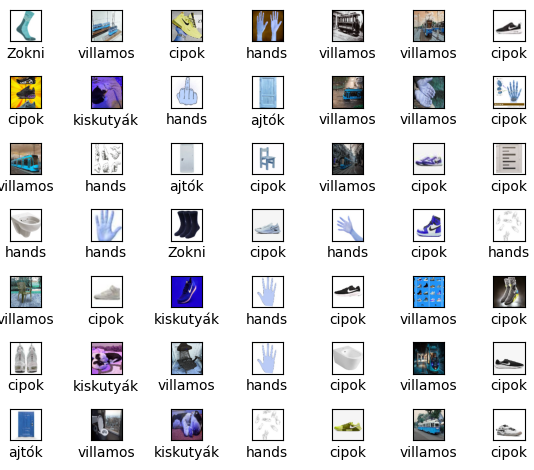

In [70]:
indeces = np.random.randint(0, len(x), size = 49)
images = x[indeces]

for i in range(49):
    plt.subplot(7,7,i+1)
    plt.imshow(images[i])
    plt.xlabel(lb.inverse_transform(model.predict(images[i].reshape(1, 90, 90, 3), verbose=0))[0])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

plt.show()